# Homework no.3 Machine Learning
**Stu. Name**: Mohammad Amin Dadgar 

**Stu. Id**: 4003624016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Q1

In [ ]:
## read images of 0 to 4 chracters 
image_no0 = plt.imread('datasets/usps_0.jpg')
image_no1 = plt.imread('datasets/usps_1.jpg')
image_no2 = plt.imread('datasets/usps_2.jpg')
image_no3 = plt.imread('datasets/usps_3.jpg')
image_no4 = plt.imread('datasets/usps_4.jpg')

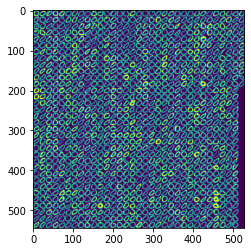

In [3]:
## show one of the images
plt.imshow(image_no0)
plt.show()

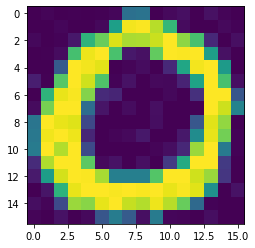

In [4]:
## take a look at one of the characters
plt.imshow(image_no0[:16, :16])

In [5]:
## open all images file 
img_numbers1 = plt.imread('datasets/usps_0.jpg')
img_numbers2 = plt.imread('datasets/usps_1.jpg')
img_numbers3 = plt.imread('datasets/usps_2.jpg')
img_numbers4 = plt.imread('datasets/usps_3.jpg')
img_numbers5 = plt.imread('datasets/usps_4.jpg')

## iterate over each images and get the valus of them
images_arr = [img_numbers1, img_numbers2, img_numbers3, img_numbers4, img_numbers5]

## each image is 16 by 16 pixels
IMAGE_SIZE_X = 16
IMAGE_SIZE_Y = 16

## feature space size is the multiplication of width and height
FEATURE_SPACE_SIZE = IMAGE_SIZE_X * IMAGE_SIZE_Y

## create pandas columns
cols = []
for i in range(0, FEATURE_SPACE_SIZE):
    cols.append(f"feature_{i}")
## there must be a label for each image
cols.append('label')

In [6]:
dataset_df = pd.DataFrame(columns=cols)

images = []
## each label for hand writed images is the index of the array
for label, image in enumerate(images_arr):
    images.append([])
    ## x of each image
    ## iterate over image columns
    for y_idx in np.arange(0, image.shape[1] - IMAGE_SIZE_Y + 1, IMAGE_SIZE_Y):
        ## iterate over image rows
        for x_idx in np.arange(0, image.shape[0] - IMAGE_SIZE_X + 1, IMAGE_SIZE_X):
            ## add images using the labels
            img = np.array(image[x_idx: x_idx + IMAGE_SIZE_X, y_idx: y_idx + IMAGE_SIZE_Y])
            images[label].append( img )

            df = pd.DataFrame(columns=cols)
            img = img.flatten()
            img = np.append(img, label) 
            img_series = pd.Series(img, index=cols)
            df = df.append(img_series, ignore_index=True)
 
            dataset_df = dataset_df.append(df, ignore_index=True)  

In [7]:
## save the images dataset into a csv file
dataset_df.to_csv('datasets/usps_images.csv', index=False)

Now we can see each images saved in arrays

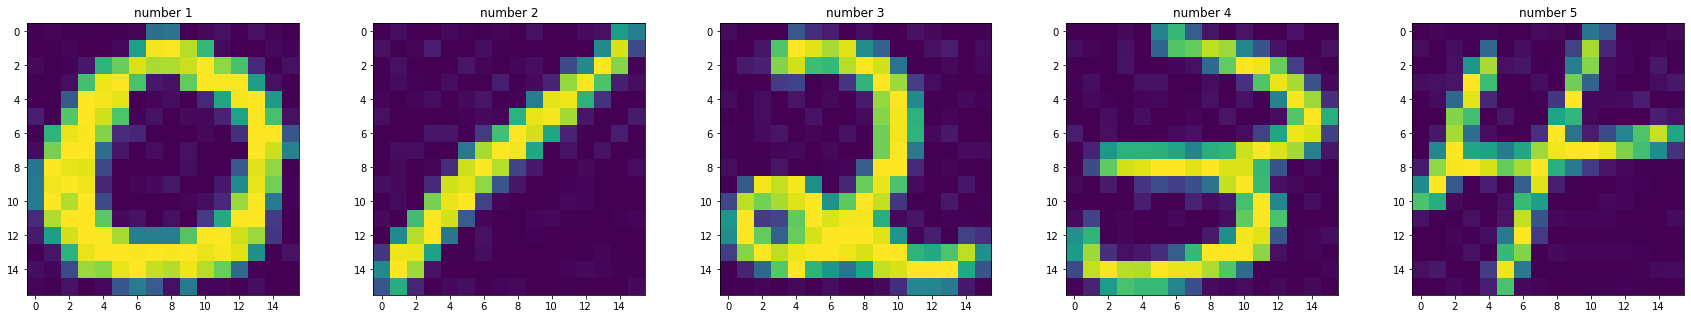

In [8]:
fig, axes = plt.subplots(1,5, figsize=(30,5))
axes[0].imshow(images[0][0])
axes[0].set_title('number 1')

axes[1].imshow(images[1][0])
axes[1].set_title('number 2')

axes[2].imshow(images[2][0])
axes[2].set_title('number 3')

axes[3].imshow(images[3][0])
axes[3].set_title('number 4')

axes[4].imshow(images[4][0])
axes[4].set_title('number 5')

plt.show()

In [2]:
## if the data was available start from here

dataset_df = pd.read_csv('datasets/usps_images.csv')
dataset_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,label
0,0,3,0,1,0,1,4,94,97,0,...,73,10,106,4,3,0,9,0,0,0
1,4,0,0,5,0,10,1,0,1,24,...,41,38,0,0,0,0,16,0,5,0
2,0,12,0,3,5,0,0,3,0,47,...,128,116,51,17,2,0,8,5,0,0
3,8,0,0,3,0,0,0,0,76,123,...,173,89,24,7,0,13,0,9,2,0
4,0,14,0,4,7,0,8,6,5,0,...,1,9,0,6,0,0,0,10,0,0


# Q2
Apply Naive Bayes model on dataset. Divide dataset into test and train 10 times randomly and train the model.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=123)

In [11]:
## using the codes we've written previously in Homework no.2

def probability_normal_distribution(X, mu, sigma):
    """
    The probability value for normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : float
        the mean value given
    sigma : float
        the variance given 
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    ## we've divided the equation in two parts
    p1 = 1 / (np.sqrt(np.pi * 2) * sigma)
    p2 = np.exp(-0.5 * ((X-mu) / sigma)**2 )
    
    probability = p1 * p2
    
    return probability
    
def find_MLE_Normal_distro(X):
    """
    the maximum likelihood estimation for parameters of normal distribution
    the parameters for normal distribution is covariance matrix and mean vector
    
    Parameters:
    ------------
    X : array_like
        the X input data vectors
    
    Returns:
    ---------
    mu : array_like
        the means vector
    variance : matrix_like
        the matrix representing the covariance

    """
    X = np.array(X)
    
    mu = (1 / len(X)) * np.sum(X)
    
    ## some changes was made to the ML estimation of variance
    ## because of dataset shape
    variance = np.sqrt((1 / len(X)) * np.sum((X - mu)**2))    
    
    return mu, variance

## divide the dataset into 0 and 1 labels
def estimate_MLE_NB(X, Y, features_arr):
    """
    estimate the Maximum likelihood parameters for naive bayes method
    in detail: in naive bayes we have a parameter for each dimension and each class

    Parameters:
    ------------
    X : array_like
        the input data (a pandas dataframe is prefered)
    Y : array_like
        the labels for each `X` inputs
    features : array_like
        the string array for the name of each label in training data (dimensions)

    Returns:
    --------
    MLE_estimates : dictionary 
        the estimated parameters as a dictionary
    """
    ## dictionary of maximum likelihood estimations
    MLE_estimates = {}
    for feature in features_arr:
        for label in [0, 1, 2, 3, 4]:
            mu, var = find_MLE_Normal_distro(X[Y == label][feature])
            ## each feature of class estimation
            MLE_estimates[f'{feature},{label}'] = [mu, var]
    return MLE_estimates

In [12]:
mle_estimates = estimate_MLE_NB(X_train, Y_train, X_train.columns)

In [13]:
## for each feature and each class there is a mean and variance
len(mle_estimates)

1280

In [14]:
def predict_NB(X, MLE_estimations, features_arr):
    """
    predict the class Using Naive bayes algorithm
    
    Parameters:
    ------------
    X : pandas dataframe
        Input data, `X` and `Y` should be the features
    MLE_estimations : dictionary
        Maximum likelihood estimations corresponding to each dimension and class as a dictionary with keys like `X,0`
        meaning X as first feature and 0 as first class 
        
    Returns:
    ---------
    prediction : array_like
        the array representing the probability of each class for data
    """
    ## the predicted value for each data
    prediction = []
    for idx in range(len(X)):
        ## initialize Class probability array
        class_p_arr = []
        for i in [0, 1, 2, 3, 4]:
            ## multiply probability for each dimension
            p = 1
            for feature in features_arr:
                mu, var = MLE_estimations[f'{feature},{i}']
                ## multiplying probabilities with 500 to avoid underflow
                class_prob = probability_normal_distribution(X.iloc[idx][feature],mu, var) * 500
                p = p * class_prob
            class_p_arr.append(p)

        ## save each class probability of each data
        prediction.append(class_p_arr)
    
    ## for ease of use convert to numpy
    prediction = np.array(prediction)
    return prediction

In [39]:
def report_model(confusion_matrix):
    """
    Find accuracy, precision and recall of a model using its confusion matrix
    
    Parameters:
    ------------
    confusion_matrix : matrix_like
        the confusion matrix of the result
        
    Returns:
    ---------
    accuracy : float
        the accuracy of model
    precision : float
    recall : float
    """
    ## False Positive
    FP = 0
    ## False Negative
    FN = 0
    ## True Positive
    TP = 0
    
    ## iterate the matrix
    for i in range(len(confusion_matrix)):
        TP += confusion_matrix[i, i]
        for j in range(len(confusion_matrix)):
            ## Skip True positive values
            if i != j:
                ## use the row of the matrix 
                FP += confusion_matrix[i, j]
                ## use the column of the matrix 
                FN += confusion_matrix[j, i]
    
    accuracy = TP / np.sum(confusion_matrix)
    precision =  TP / (TP + FP)
    recall = TP / (TP + FN)
    
    return accuracy, precision, recall

In [16]:
test_NB_results = predict_NB(X_test, mle_estimates, X_test.columns)

In [17]:
NB_test_class_pred = np.argmax(test_NB_results, axis=1)

In [18]:
NB_test_pred_confusion_mat = confusion_matrix(Y_test, NB_test_class_pred)
NB_test_pred_confusion_mat

array([[208,   7,   6,   2,   7],
       [  0, 192,  15,   2,   8],
       [  3,   7, 219,   3,   6],
       [  2,  10,  18, 178,   4],
       [  1,  16,   5,   0, 203]])

In [19]:
print('Accuracy,\tPrecision,\tRecall')
report_model(NB_test_pred_confusion_mat)

Accuracy,	Precision,	Recall


(0.8912655971479501, 0.8912655971479501, 0.8912655971479501)

We've achieved 89% accuracy, The question requested us to run 10 times with different dataset splits.

In [21]:
## save the results of 10 run confusion matrix in an array
model_NB_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    
    mle_estimates = estimate_MLE_NB(X_train, Y_train, X_train.columns)    
    test_NB_results = predict_NB(X_test, mle_estimates, X_test.columns)
    
    pred_result = np.argmax(test_NB_results, axis=1)
    
    conf_matrix = confusion_matrix(Y_test, pred_result)
    model_NB_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'Naive Bayes model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

Naive Bayes model,RUN 0
Accuracy: 0.8912655971479501
Precision: 0.8912655971479501
Recall: 0.8912655971479501
Naive Bayes model,RUN 1
Accuracy: 0.9180035650623886
Precision: 0.9180035650623886
Recall: 0.9180035650623886
Naive Bayes model,RUN 2
Accuracy: 0.9135472370766489
Precision: 0.9135472370766489
Recall: 0.9135472370766489
Naive Bayes model,RUN 3
Accuracy: 0.9126559714795008
Precision: 0.9126559714795008
Recall: 0.9126559714795008
Naive Bayes model,RUN 4
Accuracy: 0.9010695187165776
Precision: 0.9010695187165776
Recall: 0.9010695187165776
Naive Bayes model,RUN 5
Accuracy: 0.9251336898395722
Precision: 0.9251336898395722
Recall: 0.9251336898395722
Naive Bayes model,RUN 6
Accuracy: 0.9197860962566845
Precision: 0.9197860962566845
Recall: 0.9197860962566845
Naive Bayes model,RUN 7
Accuracy: 0.9081996434937611
Precision: 0.9081996434937611
Recall: 0.9081996434937611
Naive Bayes model,RUN 8
Accuracy: 0.9117647058823529
Precision: 0.9117647058823529
Recall: 0.9117647058823529
Naive Baye

# Q3

We've written the QDA in Homework no.2 So we've copied the previous codes, But Some changes are applied for multiclass classification task.

In [22]:
class QDA():
    """
    Quadratic Discriminant Analysis Class
    """
    def __init__(self):
        self.hyperparameters = None
    
    __
    def predict(self, X, classes):
        """
        Predict the output for the X input
        
        Parameters:
        ------------
        X : pandas dataframe
            The data to be appended
        classes : array_like
            array of class labels
        """
        hyperparameters = self.hyperparameters
        ## check if the model is not learned and the parameters is updated
        ## checking one parameter is enough 
        ## because we are assigning a value to all in learning phase 
        if len(hyperparameters) == 0:
            raise "Error! First fit the model on a dataset then try to predict the values!"
        


        ## Find the probabilities for class 0
        ## save them in an array for furthur comparisons
        prediction = []
        for i in range(len(X)):
            ## Find the predicted Class of each data
            probabilities = []
            for label in classes:
                mu, sigma = hyperparameters[str(label)]
                p = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                                        ,mu,sigma)
                probabilities.append(p)

            ## Compare and set the class with the highest probability
            P = np.argmax(probabilities)
            ## Append the number of Class
            prediction.append(int(P))
        
        return prediction
    def fit(self, X, Y):
        """
        Learning the parameters of the model (Binary Classification model!)
        
        Parameters:
        -----------
        X : pandas dataframe
            the input values to be learned, With outputs as label
        Y : array_like
            the label for the data (The binary classification task is here)
        """
        ## we need to find the mean and covariance of each class

        ## find hyperparameters of each class 
        hyperparameters = {}
        for label in np.unique(Y):
            mu, sigma = self.__find_MLE_Normal_distro(X[Y == label])
            hyperparameters[f'{label}'] = mu, sigma
        
        ## Save the parameters of the model
        self.hyperparameters = hyperparameters
            
    def __probability_multivariate_normal_distribution(self, X, mu, sigma):
        """
        The probability value for multivariate normal distribution function

        Parameters:
        ------------
        x : array_like
            the input data
        mu : array_like
            the means vector
        sigma : matrix_like
            the matrix representing the covariance

        Returns:
        --------
        probability : float
            the probability value for the x input values 
        """
        dimension = len(mu)

        ## divide the formula into 2 parts
        ## slogdet is used because of overflow/underflow problems
        p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.slogdet(sigma)[1])

        ## some changes was made to the equation
        ## because of dataset shape
        p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))


        probability = p1 * p2

        return probability

    def __find_MLE_Normal_distro(self, X):
        """
        the maximum likelihood estimation for parameters of multivatiate normal distribution
        the parameters for normal distribution is covariance matrix and mean vector

        Parameters:
        ------------
        X : array_like
            the X input data vectors

        Returns:
        ---------
        mu : array_like
            the means vector
        covariance : matrix_like
            the matrix representing the covariance

        """

        mu = (1 / len(X.T)) * np.sum(X, axis=0)

        ## some changes was made to the ML estimation of covariance
        ## because of dataset shape
        covariance = (1 / len(X.T)) * ((X-mu).T @ (X-mu))    

        return mu, covariance
   

In [23]:
model_QDA = QDA()
model_QDA.fit(X_train, Y_train)

In [24]:
model_QDA_test_results = model_QDA.predict(X_test, ['0', '1', '2', '3', '4'])

In [25]:
model_QDA_confusion_mat = confusion_matrix(Y_test, model_QDA_test_results)
model_QDA_confusion_mat

array([[192,   6,   8,   2,   0],
       [  0, 170,  74,   2,   2],
       [  0,   7, 222,   0,   1],
       [  0,   6,   8, 209,   0],
       [  0,   9,   2,   0, 202]])

In [26]:
acc_QDA, precision_QDA, recall_QDA = report_model(model_QDA_confusion_mat)
print(f'QDA Report:\nAccuracy: {acc_QDA}\nPrecision: {precision_QDA}\nRecall: {recall_QDA}')

QDA Report:
Accuracy: 0.8868092691622104
Precision: 0.8868092691622104
Recall: 0.8868092691622104


We achieved about 89 percent accuracy for one run. The question asked us to run 10 times on different splits of dataset and report the results.

In [27]:
## save the results of 10 run confusion matrix in an array
model_QDA_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    model_QDA = QDA()
    model_QDA.fit(X_train, Y_train)
    results = model_QDA.predict(X_test, ['0', '1', '2', '3', '4'])
    conf_matrix = confusion_matrix(Y_test, model_QDA_test_results)
    model_QDA_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'QDA model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

QDA model,RUN 0
Accuracy: 0.20320855614973263
Precision: 0.20320855614973263
Recall: 0.20320855614973263
QDA model,RUN 1
Accuracy: 0.20677361853832443
Precision: 0.20677361853832443
Recall: 0.20677361853832443
QDA model,RUN 2
Accuracy: 0.21390374331550802
Precision: 0.21390374331550802
Recall: 0.21390374331550802
QDA model,RUN 3
Accuracy: 0.20766488413547238
Precision: 0.20766488413547238
Recall: 0.20766488413547238
QDA model,RUN 4
Accuracy: 0.18449197860962566
Precision: 0.18449197860962566
Recall: 0.18449197860962566
QDA model,RUN 5
Accuracy: 0.20053475935828877
Precision: 0.20053475935828877
Recall: 0.20053475935828877
QDA model,RUN 6
Accuracy: 0.20320855614973263
Precision: 0.20320855614973263
Recall: 0.20320855614973263
QDA model,RUN 7
Accuracy: 0.22103386809269163
Precision: 0.22103386809269163
Recall: 0.22103386809269163
QDA model,RUN 8
Accuracy: 0.19875222816399288
Precision: 0.19875222816399288
Recall: 0.19875222816399288
QDA model,RUN 9
Accuracy: 0.8868092691622104
Precision:

# Q4
Using Linear Discriminant Analysis (A version of QDA). It uses same covariance matrix for all data. 

For this fact we find one covariance matrix for all data and mean vectors for each class.

In [38]:
class LDA():
    """
    Linear Discriminant Analysis Class
    """
    def __init__(self):
        self.mu_vectors = None
        self.covariance = None
    
    __
    def predict(self, X):
        """
        Predict the output for the X input
        
        Parameters:
        ------------
        X : pandas dataframe
            The data to be appended
        classes : array_like
            array of class labels
        """
        mu_vectors = self.mu_vectors
        covariance = self.covariance
        
        ## check if the model is not learned and the parameters is updated
        ## checking one parameter is enough 
        ## because we are assigning a value to all in learning phase 
        if len(mu_vectors) == 0:
            raise "Error! First fit the model on a dataset then try to predict the values!"

        ## Find the probabilities for class 0
        ## save them in an array for furthur comparisons
        prediction = []
        for i in range(len(X)):
            ## Find the predicted Class of each data
            probabilities = []
            
            for label in range(len(mu_vectors)):
                mu = mu_vectors[label]
                p = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                                        ,mu,covariance)
                probabilities.append(p)

            ## Compare and set the class with the highest probability
            P = np.argmax(probabilities)
            ## Append the number of Class
            prediction.append(int(P))
        
        return prediction
    def fit(self, X, Y):
        """
        Learning the parameters of the model (Binary Classification model!)
        
        Parameters:
        -----------
        X : pandas dataframe
            the input values to be learned, With outputs as label
        Y : array_like
            the label for the data (The binary classification task is here)
        """
        ## we need to find the mean of each class and a covariance matrix for all of the data
        _, covariance = self.__find_MLE_Normal_distro(X) 
        
        ## find mu vectors of each class 
        mu_vectors = [] 
        for label in np.unique(Y):
            mu, _ = self.__find_MLE_Normal_distro(X[Y == label])
            mu_vectors.append(mu)
        
        ## Save the parameters of the model
        self.mu_vectors = mu_vectors
        self.covariance = covariance
            
    def __probability_multivariate_normal_distribution(self, X, mu, sigma):
        """
        The probability value for multivariate normal distribution function

        Parameters:
        ------------
        x : array_like
            the input data
        mu : array_like
            the means vector
        sigma : matrix_like
            the matrix representing the covariance

        Returns:
        --------
        probability : float
            the probability value for the x input values 
        """
        dimension = len(mu)

        ## divide the formula into 2 parts
        ## slogdet is used because of overflow/underflow problems
        p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.slogdet(sigma)[1])

        ## some changes was made to the equation
        ## because of dataset shape
        p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))


        probability = p1 * p2

        return probability

    def __find_MLE_Normal_distro(self, X):
        """
        the maximum likelihood estimation for parameters of multivatiate normal distribution
        the parameters for normal distribution is covariance matrix and mean vector

        Parameters:
        ------------
        X : array_like
            the X input data vectors

        Returns:
        ---------
        mu : array_like
            the means vector
        covariance : matrix_like
            the matrix representing the covariance

        """

        mu = (1 / len(X.T)) * np.sum(X, axis=0)

        ## some changes was made to the ML estimation of covariance
        ## because of dataset shape
        covariance = (1 / len(X.T)) * ((X-mu).T @ (X-mu))    

        return mu, covariance
   

In [29]:
model_LDA = LDA()
model_LDA.fit(X_train, Y_train)
model_LDA_results = model_LDA.predict(X_test)

In [30]:
model_LDA_confusion_mat = confusion_matrix(Y_test ,model_LDA_results)
model_LDA_confusion_mat

array([[195,   9,   2,   2,   0],
       [  0, 241,   1,   4,   2],
       [  2,  18, 204,   1,   5],
       [  1,  12,   8, 201,   1],
       [  0,  20,   4,   0, 189]])

In [31]:
acc_LDA, precision_LDA, recall_LDA = report_model(model_LDA_confusion_mat)
print(f'LDA Report:\nAccuracy: {acc_LDA}\nPrecision: {precision_LDA}\nRecall: {recall_LDA}')

LDA Report:
Accuracy: 0.9180035650623886
Precision: 0.9180035650623886
Recall: 0.9180035650623886


We've achieved 91% accuracy. This shows the LDA model can perform better than the more complex models as QDA and Naive Bayes.

Now we're going to run 10 times the LDA model with different data splits.

In [33]:
## save the results of 10 run confusion matrix in an array
model_LDA_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    model_LDA = LDA()
    model_LDA.fit(X_train, Y_train)
    results = model_LDA.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, results)
    model_LDA_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'LDA model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

LDA model,RUN 0
Accuracy: 0.9171122994652406
Precision: 0.9171122994652406
Recall: 0.9171122994652406
LDA model,RUN 1
Accuracy: 0.9340463458110517
Precision: 0.9340463458110517
Recall: 0.9340463458110517
LDA model,RUN 2
Accuracy: 0.9206773618538324
Precision: 0.9206773618538324
Recall: 0.9206773618538324
LDA model,RUN 3
Accuracy: 0.9313725490196079
Precision: 0.9313725490196079
Recall: 0.9313725490196079
LDA model,RUN 4
Accuracy: 0.9215686274509803
Precision: 0.9215686274509803
Recall: 0.9215686274509803
LDA model,RUN 5
Accuracy: 0.9331550802139037
Precision: 0.9331550802139037
Recall: 0.9331550802139037
LDA model,RUN 6
Accuracy: 0.9340463458110517
Precision: 0.9340463458110517
Recall: 0.9340463458110517
LDA model,RUN 7
Accuracy: 0.9278074866310161
Precision: 0.9278074866310161
Recall: 0.9278074866310161
LDA model,RUN 8
Accuracy: 0.93048128342246
Precision: 0.93048128342246
Recall: 0.93048128342246
LDA model,RUN 9
Accuracy: 0.9180035650623886
Precision: 0.9180035650623886
Recall: 0.918

# Q5
Now we're going to use decision tree (DT) classifier for characters dataset.

In [6]:
model_tree = tree.DecisionTreeClassifier(criterion='gini')
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Some parameters are set as default, so let's have a look at them.

In [7]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

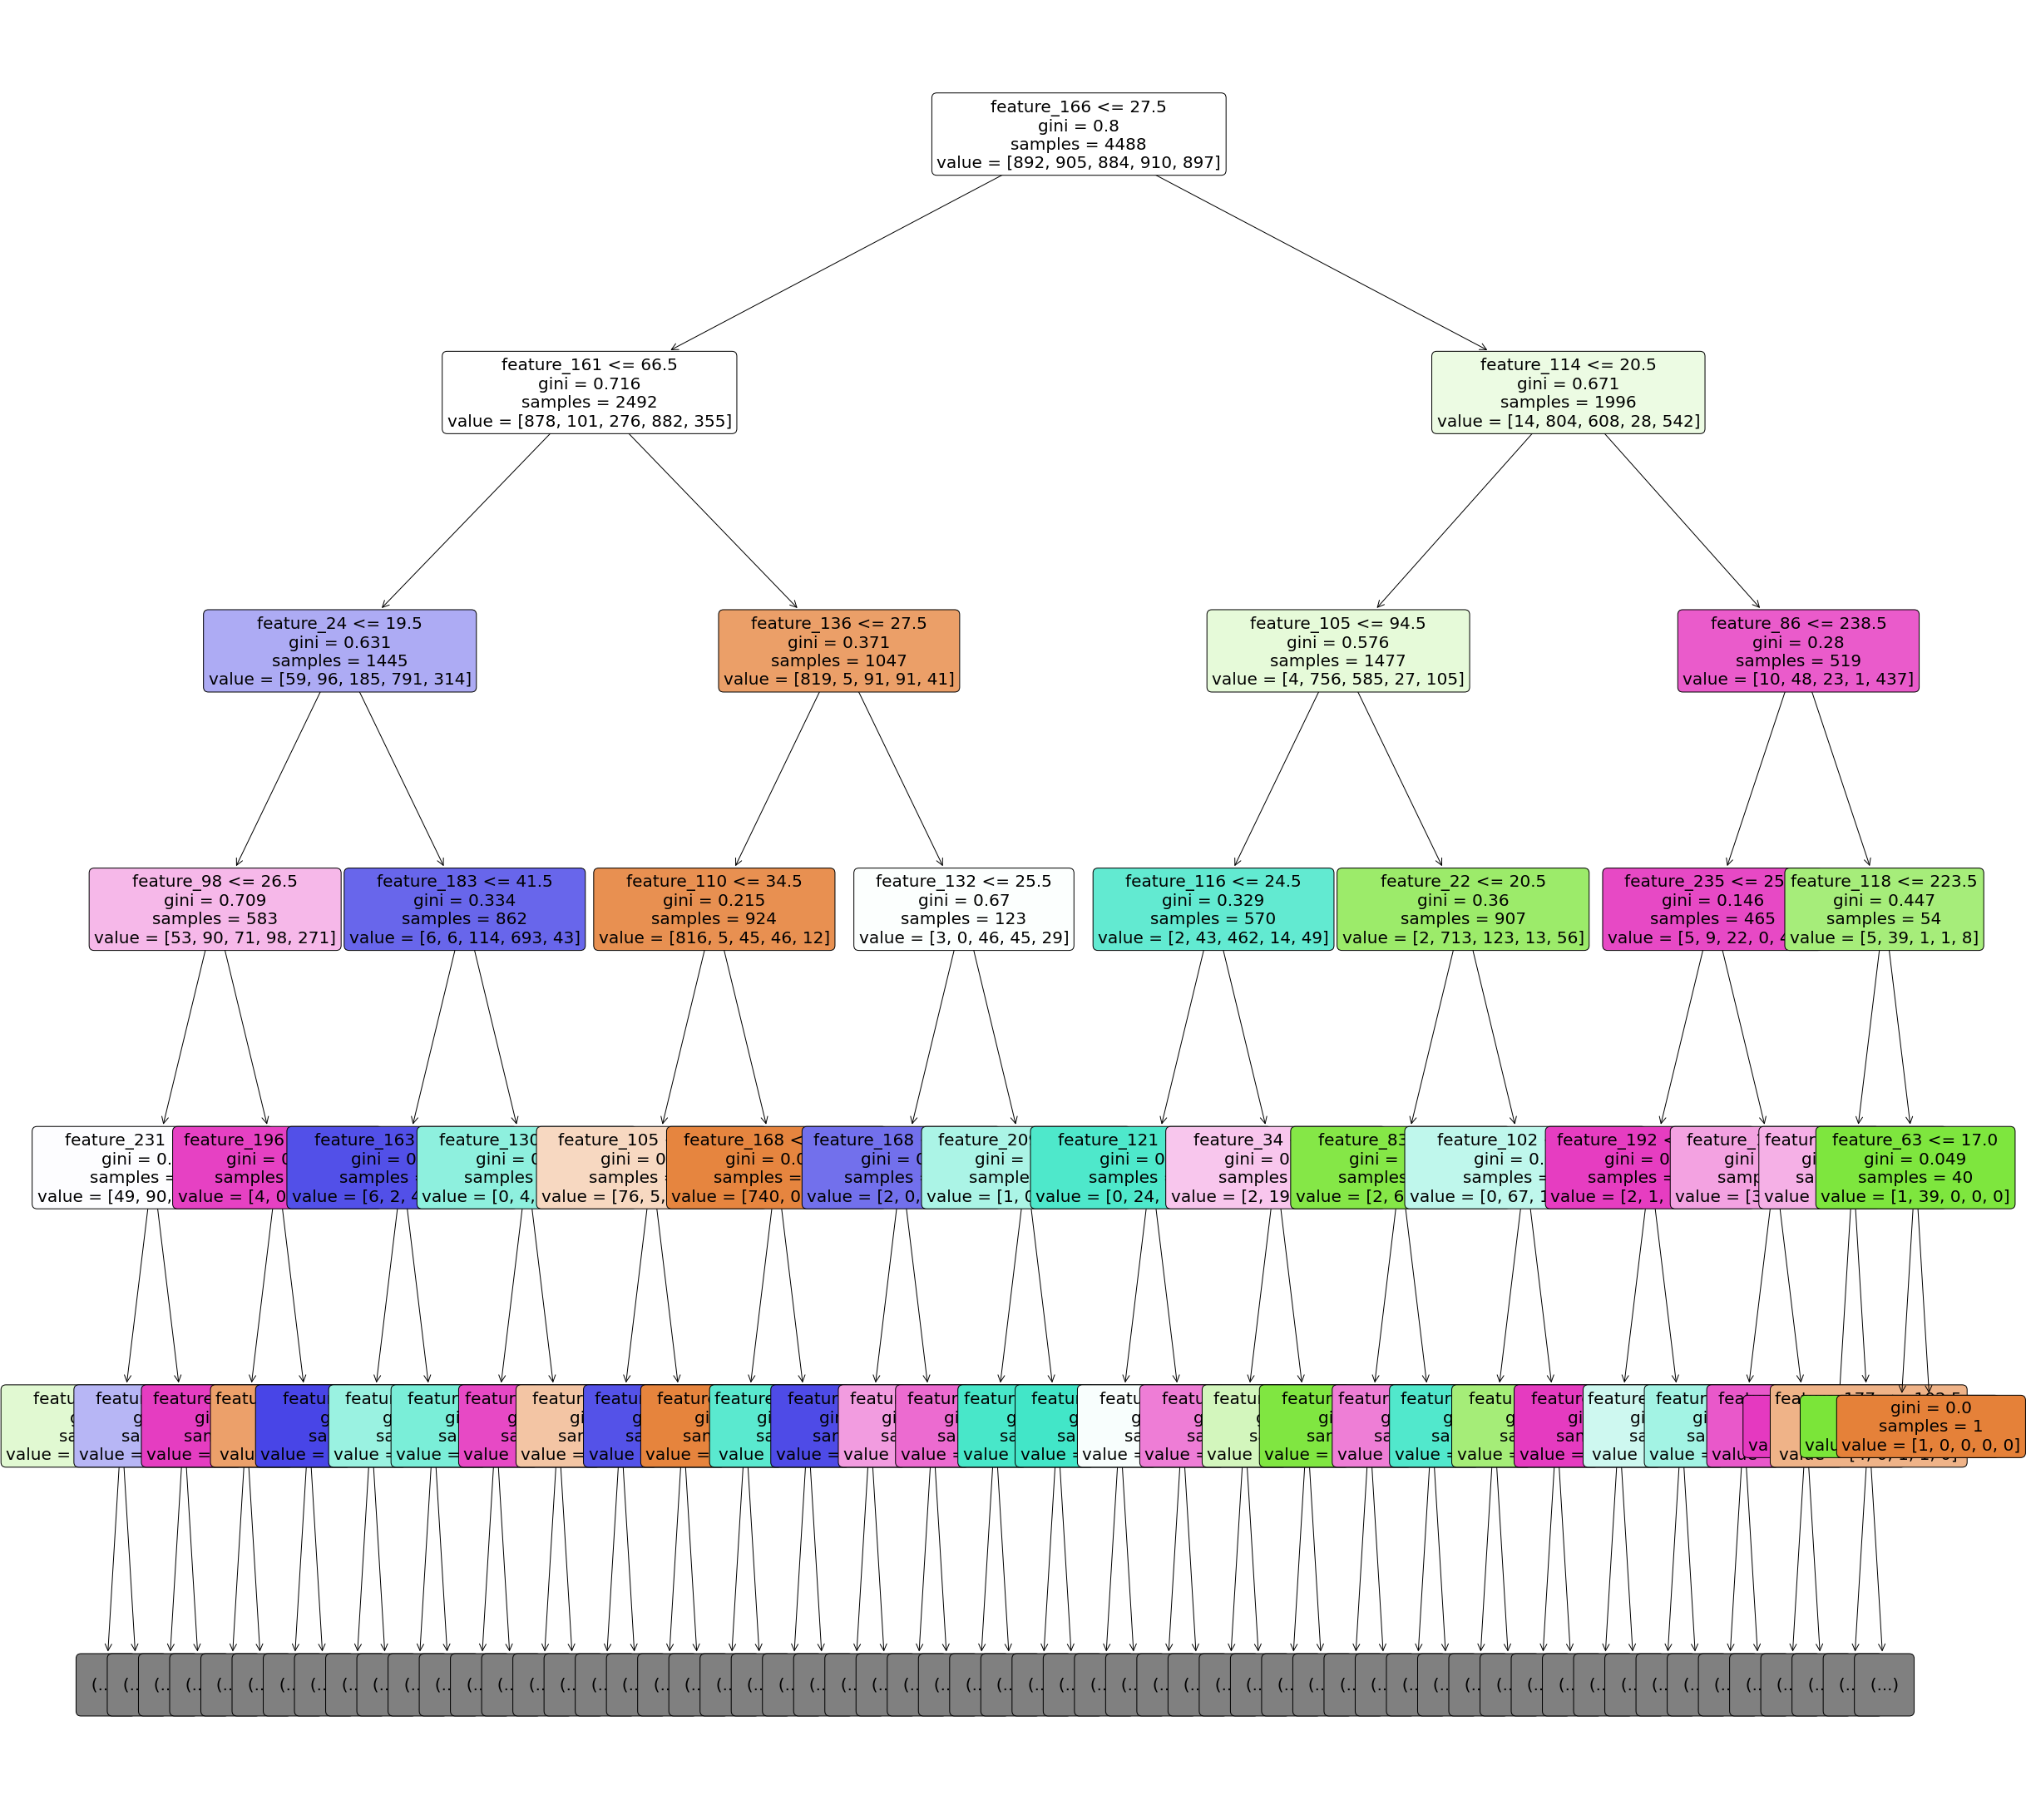

In [22]:
## plotting tree with maximum depth of 5 
## because our tree is big we have limited it to 5 
plt.figure(figsize=(40,40))
tree.plot_tree(model_tree,
               feature_names=X_train.columns,
              filled=True,
              impurity=True,
              rounded=True,
              fontsize=20
              ,max_depth=5)
plt.savefig('Q5_tree_plot.png')

In [8]:
model_tree_test_pred = model_tree.predict(X_test)

In [12]:
model_tree_conf_mat = confusion_matrix(Y_test, model_tree_test_pred)

print('Accuracy,\tPrecision,\tRecall')
report_model(model_tree_conf_mat)

Accuracy,	Precision,	Recall


(0.8877005347593583, 0.8877005347593583, 0.8877005347593583)

In [13]:
## running the model 10 times

## save the results of 10 run confusion matrix in an array
model_tree_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    model_tree = tree.DecisionTreeClassifier()
    model_tree.fit(X_train, Y_train)
    results = model_tree.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, results)
    model_tree_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'LDA model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

LDA model,RUN 0
Accuracy: 0.8841354723707665
Precision: 0.8841354723707665
Recall: 0.8841354723707665
LDA model,RUN 1
Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
Recall: 0.8787878787878788
LDA model,RUN 2
Accuracy: 0.9099821746880571
Precision: 0.9099821746880571
Recall: 0.9099821746880571
LDA model,RUN 3
Accuracy: 0.8894830659536542
Precision: 0.8894830659536542
Recall: 0.8894830659536542
LDA model,RUN 4
Accuracy: 0.8868092691622104
Precision: 0.8868092691622104
Recall: 0.8868092691622104
LDA model,RUN 5
Accuracy: 0.8921568627450981
Precision: 0.8921568627450981
Recall: 0.8921568627450981
LDA model,RUN 6
Accuracy: 0.8761140819964349
Precision: 0.8761140819964349
Recall: 0.8761140819964349
LDA model,RUN 7
Accuracy: 0.8832442067736186
Precision: 0.8832442067736186
Recall: 0.8832442067736186
LDA model,RUN 8
Accuracy: 0.8859180035650623
Precision: 0.8859180035650623
Recall: 0.8859180035650623
LDA model,RUN 9
Accuracy: 0.8832442067736186
Precision: 0.8832442067736186
Recall:

In 10 runs we saw that the model achieved lower performance than the LDA model.

# Q6
Using SVM model for dataset.

In [15]:
model_svm = svm.SVC()
## having a look at default parameters 
model_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
model_svm.fit(X_train, Y_train)
model_svm_test_pred = model_svm.predict(X_test)

In [18]:
svm_confusion_mat = confusion_matrix(Y_test, model_svm_test_pred)
svm_confusion_mat

array([[202,   6,   0,   0,   0],
       [  0, 248,   0,   0,   0],
       [  1,   7, 220,   0,   2],
       [  0,   7,   0, 216,   0],
       [  0,   9,   0,   0, 204]])

In [19]:
print('Accuracy,\tPrecision,\tRecall')
report_model(svm_confusion_mat)

Accuracy,	Precision,	Recall


(0.9714795008912656, 0.9714795008912656, 0.9714795008912656)

we can see that SVM achived much higher performance on test set than the other models we tried in this excercises.

In [20]:
## running the model 10 times

## save the results of 10 run confusion matrix in an array
model_svm_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    model_svm = svm.SVC()
    model_svm.fit(X_train, Y_train)
    results = model_svm.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, results)
    model_svm_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'LDA model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

LDA model,RUN 0
Accuracy: 0.9750445632798574
Precision: 0.9750445632798574
Recall: 0.9750445632798574
LDA model,RUN 1
Accuracy: 0.9812834224598931
Precision: 0.9812834224598931
Recall: 0.9812834224598931
LDA model,RUN 2
Accuracy: 0.9812834224598931
Precision: 0.9812834224598931
Recall: 0.9812834224598931
LDA model,RUN 3
Accuracy: 0.9786096256684492
Precision: 0.9786096256684492
Recall: 0.9786096256684492
LDA model,RUN 4
Accuracy: 0.9714795008912656
Precision: 0.9714795008912656
Recall: 0.9714795008912656
LDA model,RUN 5
Accuracy: 0.9759358288770054
Precision: 0.9759358288770054
Recall: 0.9759358288770054
LDA model,RUN 6
Accuracy: 0.9786096256684492
Precision: 0.9786096256684492
Recall: 0.9786096256684492
LDA model,RUN 7
Accuracy: 0.9803921568627451
Precision: 0.9803921568627451
Recall: 0.9803921568627451
LDA model,RUN 8
Accuracy: 0.9795008912655971
Precision: 0.9795008912655971
Recall: 0.9795008912655971
LDA model,RUN 9
Accuracy: 0.9714795008912656
Precision: 0.9714795008912656
Recall:

# Q7
Apply PCA and Fisher dimension reductinon methods on data and then use LDA model to be trained.

## (a) Fisher dimension reduction method

In [3]:
X_dataset = dataset_df[dataset_df.columns[:-1]]
Y_dataset = dataset_df['label']

centered_df = X_dataset - X_dataset.mean()
within_class_variation = (centered_df).T @ centered_df

In [67]:
class Fishers_dimension_reduction():
    """
    reduce dimension of dataset using fishers method (Or LDA in other names)
    
    """
    def __init__(self, n_components=0.95):
        """
        Parameters:
        ------------
        n_components : float
            can be a number between 0 and 1 that represents the data loss, default is `0.95` means the data loss is 0.05
            can be a number more than 1 that represents how many dimensions to save
        """
        self.n_components = n_components
        
        ## the matrix that transform data into new dimensionality
        self.transformation_matrix = None
        
    def __find_most_discriminator_eigenvectors(self, eigvalues, eigvectors):
        """
        find the most discriminator dimensions by sorting eigenvalues and returning the best eigenvectors corresponding to the highest eigen values
        rate is used to how much to save the dimensions

        Parameters:
        ------------
        eigvalues : 1D array
            array of eigen values
        eigvectors : 2D array
            array of eigen vectors
            
        Returns:
        ---------
        eig_vectors : matrix
            the most discriminative eigen vectors
        """
        if (0<= self.n_components) and (self.n_components <=1):
            eig_vectors = self.__find_the_most_discriminator_floating(eigvalues, eigvectors)
        else:
            eig_vectors = self.__sort_eigvalues_corresponding_eigenvectors(eigvalues, eigvectors)
            eig_vectors = eig_vectors[0:n_components]
        
        return eig_vectors
    
    def __find_the_most_discriminator_floating(self, eigvalues, eigvectors):
        """
        find the most discriminator dimension when the n_components is a floating point between 0 and 1
        """
        ## apply pandas dataframe to have an index corresponding to each row
        eigvalues_df = pd.DataFrame(eigvalues)
        sorted_indexes = eigvalues_df.sort_values(by=0, ascending=False).index.values


        
        sorted_eigvectors_df = self.__sort_eigvalues_corresponding_eigenvectors(eig_values, eig_vectors)
        ## iterate over data until it reached the threshold
        threshold = 0
        ## initialize the range of data 
        dimension_range = None

        for idx in range(len(sorted_eigvectors_df) - 1):
            threshold = abs(np.sum(eigvalues_df.loc[sorted_indexes[0:idx+1]])) / abs(np.sum(eigvalues))
            if threshold.values >= self.n_components:
                dimension_range = idx
                break
        return sorted_eigvectors_df.iloc[0:dimension_range]
    
    def __sort_eigvalues_corresponding_eigenvectors(self, eigvalues, eigvectors):
        """
        sort the eigenvectors by the highest eigenvalues
        
        Parameters:
        ------------
        eigvalues : array
            array of eigenvalues
        eigvectors : matrix
            array of eigenvectors corresponding to each eigenvalues
            
        Returns:
        ---------
        sorted_eigenvectors : pandas dataframe
            dataframe of eigenvectors related to Descending sorted eigenvalues
        """
        ## apply pandas dataframe to have an index corresponding to each row
        eigvalues_df = pd.DataFrame(eigvalues)
        
        ## get the sorted eigen values indexes
        sorted_indexes = eigvalues_df.sort_values(by=0, ascending=False).index.values


        ## convert eigenvectors to pandas to find the best of it corresponding to highest eigenvalues
        eigvectors_df = pd.DataFrame(eigvectors)
        ## and then find the corresponding eigen vectors
        sorted_eigvectors_df = eigvectors_df.reindex(sorted_indexes)
        
        return sorted_eigvectors_df

        
    def fit(self, X_data, classes_name):
        """
        fit the parameters for dimensionality reduction
        
        Parameters:
        -----------
        X_data : matrix or array
            the X classes as a matrix or array
            array can only represent one feature but matrix would represent more than one feature
        classes_name : array
            array of classes label (must be unique)
        """
        
        ## finding between class variation

        ## initialize the variable with zero values
        between_class_variation = np.zeros((256, 256))

        ## find the global mean
        dataset_mean = X_data.mean()

        ## iterate for each class 
        for class_num in classes_name:
                ## find the local mean (Each class mean)
                ## and get the difference
                difference = X_data[Y_dataset == class_num].mean() - dataset_mean
                difference = np.matrix(difference)
                between_class_variation += difference.T @ difference
                
        ## combining both matrixes
        J = np.linalg.inv(within_class_variation) @ between_class_variation

        eig_values, eig_vectors = np.linalg.eig(J)
        
        ## find the transformation matrix 
        U = self.__find_most_discriminator_eigenvectors(eig_values, eig_vectors)
        
        self.transformation_matrix = U.T
        
    def transform(self, X_data):
        """
        transform dataset into new reduced dimensionality
        
        Parameters:
        ------------
        X_data : matrix_like
            the X classes as a matrix or array
            matrix would represent more than one feature 
        
        Returns:
        ---------
        X_reduced : matrix_like
            the reduced dimension X_data
        """
        X_reduced = np.dot(self.transformation_matrix.T, X_data.T).T
        
        return X_reduced
    
    def fit_transform(self, X_data, classes_name):
        """
        fit on data and then return the reduced version of X_data
        
        Parameters:
        -----------
        X_data : matrix or array
            the X classes as a matrix or array
            array can only represent one feature but matrix would represent more than one feature
        classes_name : array
            array of classes label (must be unique)
            
        Returns:
        ---------
        X_reduced : matrix_like
            the reduced dimension X_data
        """
        self.fit(X_data, classes_name)
        X_reduced = self.transform(X_data)
        
        return X_reduced

In [69]:
fisher_reduction = Fishers_dimension_reduction()
X_reduced_dataset = fisher_reduction.fit_transform(X_dataset, np.unique(Y_dataset))
X_reduced_dataset.shape

(5610, 3)

In [ ]:
model_LDA = LDA()
model_LDA.fit(X_red.T, Y_dataset)
model_LDA_results = model_LDA.predict(pd.DataFrame(X_test))

## (b) PCA dimension reduction method
Saving 95% of features and whitening the dataset.

In [118]:
X_dataset = dataset_df[dataset_df.columns[:-1]]
Y_dataset = dataset_df['label']

pca = PCA(n_components=0.95,whiten=True, svd_solver='full')
pca.fit(X_dataset)
X_dataset_reduced = pca.transform(X_dataset)

It seems that 95% of data variance is in 100 of the features. the other 5 percent is in the other 150 features.

In [119]:
X_dataset_reduced.shape

(5610, 100)

In [120]:
## have a look at variances
pca.explained_variance_

array([293331.87410841, 158119.05900527, 137937.08914476, 126798.433732  ,
       103117.73500377,  89887.35327351,  77749.6914955 ,  50172.87297051,
        45807.33462414,  38951.06624323,  35248.39082542,  32714.42323582,
        30933.88036519,  30225.16754704,  26959.18443678,  25179.5259855 ,
        23453.45575095,  22159.41485451,  20569.87854983,  18919.04164789,
        18335.37124556,  17894.17986046,  16274.90525257,  15626.73732931,
        14930.51616494,  14487.07813265,  13935.53954212,  12847.4915951 ,
        12200.14742319,  11851.5244597 ,  11608.67280995,  11027.93554689,
        10438.56099896,   9918.99381511,   9825.26443153,   9610.42316895,
         9026.15107666,   8475.19580363,   8112.47976397,   7909.35264363,
         7549.8558876 ,   7382.37198072,   7030.60232858,   6771.14100226,
         6573.08342079,   6535.76291499,   6405.82355752,   6026.2193113 ,
         5781.87826222,   5656.70352764,   5575.56618965,   5327.63682127,
         5253.24969877,  

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset_reduced,
                                                    Y_dataset, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

In [75]:
model_LDA = LDA()
model_LDA.fit(X_train, Y_train)
model_LDA_results = model_LDA.predict(pd.DataFrame(X_test))

In [76]:
model_LDA_confusion_mat = confusion_matrix(Y_test ,model_LDA_results)
model_LDA_confusion_mat

array([[194,   7,  24,   1,   4],
       [  0, 204,   9,   2,   2],
       [  1,   6, 231,   0,   0],
       [  1,   5,  25, 181,   0],
       [  0,  32,  15,   0, 178]], dtype=int64)

In [79]:
acc_LDA, precision_LDA, recall_LDA = report_model(model_LDA_confusion_mat)
print(f'LDA Report:\nAccuracy: {acc_LDA}\nPrecision: {precision_LDA}\nRecall: {recall_LDA}')

LDA Report:
Accuracy: 0.8805704099821747
Precision: 0.8805704099821747
Recall: 0.8805704099821747


In [124]:
## save the results of 10 run confusion matrix in an array
model_LDA_resuls_confusion_matrix = []
## run count
N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_dataset_reduced, 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=(123 + i))
    model_LDA = LDA()
    model_LDA.fit(X_train, Y_train)
    results = model_LDA.predict(pd.DataFrame(X_test))
    conf_matrix = confusion_matrix(Y_test, results)
    model_LDA_resuls_confusion_matrix.append(conf_matrix)
    
    acc, precision, recall = report_model(conf_matrix)
    print(f'LDA model,RUN {i}\nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

LDA model,RUN 0
Accuracy: 0.8805704099821747
Precision: 0.8805704099821747
Recall: 0.8805704099821747
LDA model,RUN 1
Accuracy: 0.9126559714795008
Precision: 0.9126559714795008
Recall: 0.9126559714795008
LDA model,RUN 2
Accuracy: 0.8636363636363636
Precision: 0.8636363636363636
Recall: 0.8636363636363636
LDA model,RUN 3
Accuracy: 0.9046345811051694
Precision: 0.9046345811051694
Recall: 0.9046345811051694
LDA model,RUN 4
Accuracy: 0.893048128342246
Precision: 0.893048128342246
Recall: 0.893048128342246
LDA model,RUN 5
Accuracy: 0.8983957219251337
Precision: 0.8983957219251337
Recall: 0.8983957219251337
LDA model,RUN 6
Accuracy: 0.910873440285205
Precision: 0.910873440285205
Recall: 0.910873440285205
LDA model,RUN 7
Accuracy: 0.9090909090909091
Precision: 0.9090909090909091
Recall: 0.9090909090909091
LDA model,RUN 8
Accuracy: 0.9162210338680927
Precision: 0.9162210338680927
Recall: 0.9162210338680927
LDA model,RUN 9
Accuracy: 0.875222816399287
Precision: 0.875222816399287
Recall: 0.87522